<a href="https://colab.research.google.com/github/salmanromeo/MAE_3403_Computer_Methods_in_Analysis_and_Design/blob/main/lecture_3_2D_Heat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The 2-D Heat Equation**

\begin{align}
  \dfrac{\mathrm{d}{u}}{\mathrm{d}t} = α(\dfrac{\mathrm{d^2}{u}}{\mathrm{d}x^2} +\dfrac{\mathrm{d^2}{u}}{\mathrm{d}y^2})
    \end{align}
#####Initial condition:
\begin{align}
  u(x,y,0) = f(x,y)
    \end{align}
#####Where,
\begin{align}
  f(x,y) = sin(\dfrac{πx}{L})sin(\dfrac{πy}{L})
    \end{align}
#####Boundary condition:

1.   Dirichlet boundary condition
2.   Neumann boundary condition

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Define the function that represents the 2D heat equation
def heat_eqn(t, u, dx, alpha):
    n, m = u.shape
    dudt = np.zeros_like(u)

    # Set boundary conditions
    dudt[0,:] = 0
    dudt[-1,:] = 0
    dudt[:,0] = 0
    dudt[:,-1] = 0

    # Calculate second order derivatives using central differences
    d2udx2 = (u[2:,1:-1] - 2*u[1:-1,1:-1] + u[:-2,1:-1])/(dx**2)
    d2udy2 = (u[1:-1,2:] - 2*u[1:-1,1:-1] + u[1:-1,:-2])/(dx**2)

    # Calculate dudt using heat equation
    dudt[1:-1,1:-1] = alpha*(d2udx2 + d2udy2)

    # Using for loop
    # for i in range(1, ny-1):
            # for j in range(1, nx-1):
                # dudt[i,j] = alpha*((u[i-1,j]-2*u[i,j]+u[i+1,j])/dy**2 + (u[i,j-1]-2*u[i,j]+u[i,j+1])/dx**2)
    return dudt

# Define the Euler method
def euler(f, y0, t, h, dx, alpha):
  n = len(t)
  nx, ny = y0.shape
  y = np.zeros((n, nx, ny))
  y[0] = y0
  for i in range(n-1):
    y[i+1] = y[i] + h*f(t[i], y[i], dx, alpha)
  return y

# Define the Runge-Kutta method
def runge_kutta(f, y0, t, h, dx, alpha):
    n = len(t)
    u = np.zeros((n, *y0.shape))
    u[0] = y0
    for i in range(n-1):
        k1 = h*f(t[i], u[i], dx, alpha)
        k2 = h*f(t[i] + h/2, u[i] + k1/2, dx, alpha)
        k3 = h*f(t[i] + h/2, u[i] + k2/2, dx, alpha)
        k4 = h*f(t[i] + h, u[i] + k3, dx, alpha)
        u[i+1] = u[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return u

# Define the initial conditions and parameters
L = 1                       # Length of the square plate
n = 20                      # Number of points on each side
dx = L/(n-1)                # Spacing between points
x = np.linspace(0, L, n)    # Points on x-axis
y = np.linspace(0, L, n)    # Points on y-axis
X, Y = np.meshgrid(x, y)    # Meshgrid of points
T0 = np.sin(np.pi*X/L)*np.sin(np.pi*Y/L)  # Initial temperature distribution
alpha = 0.01                # Thermal diffusivity
t = np.arange(0, 1.05, 0.05)   # Time steps
h = t[1] - t[0]

solution1 = euler(heat_eqn, T0, t, h, dx, alpha)
solution2 = runge_kutta(heat_eqn, T0, t, h, dx, alpha)

# Exact solution of the 2D heat equation
def exact_solution(X, Y, t, alpha):
    return np.exp(-2*np.pi**2*alpha*t/L**2)*np.sin(np.pi*X/L)*np.sin(np.pi*Y/L)

exact = np.zeros_like(solution2)
for i in range(len(t)):
    exact[i] = exact_solution(X, Y, t[i], alpha)

error_eu = np.abs(solution1 - exact)
error_rk = np.abs(solution2 - exact)

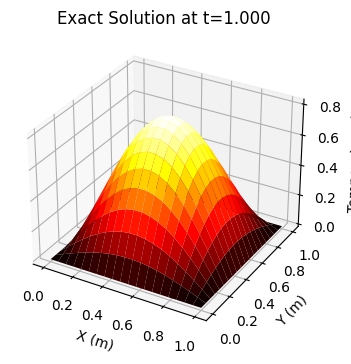

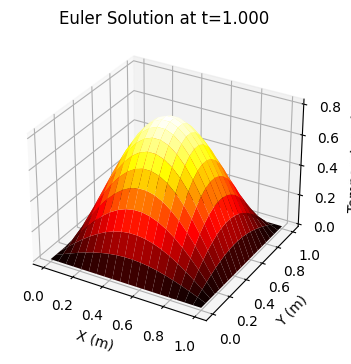

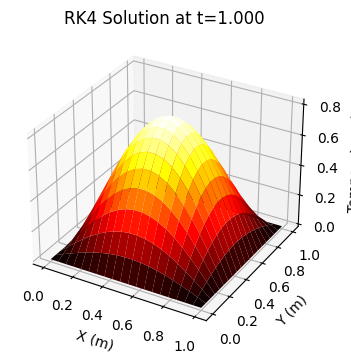

In [ ]:
# Plotting 3D surface of temperature distribution
fig = plt.figure(figsize=(6, 4))
ax = plt.axes(projection='3d')
X, Y = np.meshgrid(x, y)

for i in range(0, len(t), len(t)//10):
    Z3 = exact[i]
ax.plot_surface(X, Y, Z3, cmap='hot')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Temperature (K)')
ax.set_title(f"Exact Solution at t={t[i]:.3f}")
plt.show()

# Plotting 3D surface of temperature distribution
fig = plt.figure(figsize=(6, 4))
ax = plt.axes(projection='3d')
X, Y = np.meshgrid(x, y)

for i in range(0, len(t), len(t)//10):
    Z1 = solution1[i]
ax.plot_surface(X, Y, Z1, cmap='hot')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Temperature (K)')
ax.set_title(f"Euler Solution at t={t[i]:.3f}")
plt.show()

# Plotting 3D surface of temperature distribution
fig = plt.figure(figsize=(6, 4))
ax = plt.axes(projection='3d')
X, Y = np.meshgrid(x, y)

for i in range(0, len(t), len(t)//10):
    Z2 = solution2[i]
ax.plot_surface(X, Y, Z2, cmap='hot')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Temperature (K)')
ax.set_title(f"RK4 Solution at t={t[i]:.3f}")
plt.show()

**Dirichlet boundary condition**

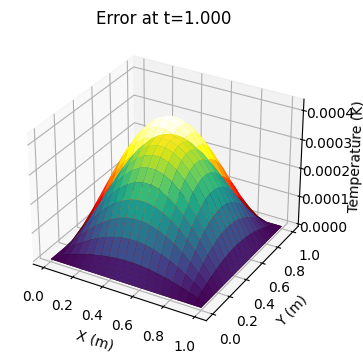

In [ ]:
# Plotting 3D surface of temperature distribution
fig = plt.figure(figsize=(6, 4))
ax = plt.axes(projection='3d')
X, Y = np.meshgrid(x, y)

for i in range(0, len(t), len(t)//10):
    Z4 = error_eu[i]
    Z5 = error_rk[i]
ax.plot_surface(X, Y, Z4, cmap='hot', label='Euler error')
ax.plot_surface(X, Y, Z5, cmap='viridis', label='RK4 error')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Temperature (K)')
ax.set_title(f"Error at t={t[i]:.3f}")
plt.show()

In [ ]:
from PIL import Image

# Generating temperature distribution plots and saving them as images
for i in range(0, len(t), len(t)//10):
    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection='3d')
    X, Y = np.meshgrid(x, y)
    Z = solution2[i]
    ax.plot_surface(X, Y, Z, cmap='hot')
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    ax.set_zlabel('Temperature (K)')
    ax.set_title(f"t={t[i]:.3f}")
    plt.savefig(f"temp_dist_{i}.png")
    plt.close()

# Creating a gif animation from the saved images
frames = []
for i in range(0, len(t), len(t)//10):
    filename = f"temp_dist_{i}.png"
    frames.append(Image.open(filename))
frames[0].save('temp_dist.gif', format='GIF', append_images=frames[1:], save_all=True, duration=500, loop=0)

**Neumann boundary condition**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Define the function that represents the 2D heat equation
def heat_eqn(t, u, dx, alpha):
    n, m = u.shape
    dudt = np.zeros_like(u)

    # Set boundary conditions
    dudt[0,:] = dudt[1,:]
    dudt[-1,:] = dudt[-2,:]
    dudt[:,0] = dudt[:,1]
    dudt[:,-1] = dudt[:,-2]

    # Calculate second order derivatives using central differences
    d2udx2 = (u[2:,1:-1] - 2*u[1:-1,1:-1] + u[:-2,1:-1])/(dx**2)
    d2udy2 = (u[1:-1,2:] - 2*u[1:-1,1:-1] + u[1:-1,:-2])/(dx**2)

    # Calculate dudt using heat equation
    dudt[1:-1,1:-1] = alpha*(d2udx2 + d2udy2)

    return dudt

# Define the Runge-Kutta method
def runge_kutta(f, y0, t, h, dx, alpha):
    n = len(t)
    u = np.zeros((n, *y0.shape))
    u[0] = y0
    for i in range(n-1):
        k1 = h*f(t[i], u[i], dx, alpha)
        k2 = h*f(t[i] + h/2, u[i] + k1/2, dx, alpha)
        k3 = h*f(t[i] + h/2, u[i] + k2/2, dx, alpha)
        k4 = h*f(t[i] + h, u[i] + k3, dx, alpha)
        u[i+1] = u[i] + (k1 + 2*k2 + 2*k3 + k4)/6
        # Apply Neumann boundary conditions
        u[i+1][0,:] = u[i+1][1,:]
        u[i+1][-1,:] = u[i+1][-2,:]
        u[i+1][:,0] = u[i+1][:,1]
        u[i+1][:,-1] = u[i+1][:,-2]
    return u

# Define the initial conditions and parameters
L = 1                       # Length of the square plate
n = 20                      # Number of points on each side
dx = L/(n-1)                # Spacing between points
x = np.linspace(0, L, n)    # Points on x-axis
y = np.linspace(0, L, n)    # Points on y-axis
X, Y = np.meshgrid(x, y)    # Meshgrid of points
T0 = np.sin(np.pi*X/L)*np.sin(np.pi*Y/L)  # Initial temperature distribution
alpha = 0.01                # Thermal diffusivity
t = np.arange(0, 1.05, 0.05)   # Time steps
h = t[1] - t[0]

solution = runge_kutta(heat_eqn, T0, t, h, dx, alpha)

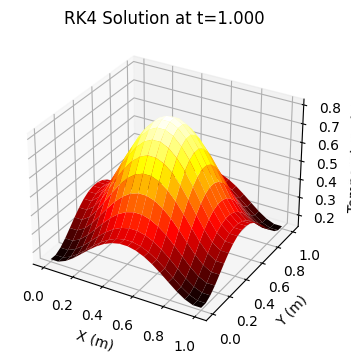

In [ ]:
# Plotting 3D surface of temperature distribution
fig = plt.figure(figsize=(6, 4))
ax = plt.axes(projection='3d')
X, Y = np.meshgrid(x, y)

for i in range(0, len(t), len(t)//10):
    Z2 = solution[i]
ax.plot_surface(X, Y, Z2, cmap='hot')
ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Temperature (K)')
ax.set_title(f"RK4 Solution at t={t[i]:.3f}")
plt.show()

In [ ]:
from PIL import Image

# Generating temperature distribution plots and saving them as images
for i in range(0, len(t), len(t)//10):
    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection='3d')
    X, Y = np.meshgrid(x, y)
    Z = solution[i]
    ax.plot_surface(X, Y, Z, cmap='hot')
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    ax.set_zlabel('Temperature (K)')
    ax.set_title(f"t={t[i]:.3f}")
    plt.savefig(f"temp_dist_{i}.png")
    plt.close()

# Creating a gif animation from the saved images
frames = []
for i in range(0, len(t), len(t)//10):
    filename = f"temp_dist_{i}.png"
    frames.append(Image.open(filename))
frames[0].save('temp_dist1.gif', format='GIF', append_images=frames[1:], save_all=True, duration=500, loop=0)